In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Step 1: Read and Display Data
data = pd.read_excel('Lung Capacity.xlsx')  # Update with the correct file path
print("Sample data:")
print(data.head())

# Step 2: Data Wrangling
print("\nData Shape:", data.shape)
print("Data Size:", data.size)
print("\nColumn Data Types:")
print(data.dtypes)


# Step 3: Data Encoding
le = LabelEncoder()
data['Smoke'] = le.fit_transform(data['Smoke'])
data['Gender'] = le.fit_transform(data['Gender'])

# Step 4: Divide data into Train and Test, Feature and Target
target_col = 'Risk'
X = data.drop(columns=[target_col])
y = data[target_col]

# Step 5: Implement Decision Tree and Bayesian Classification Model on Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_tree = dt_model.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)

# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)

# Display results
1


print("\nNaive Bayes Accuracy:", accuracy_nb)



Sample data:
   LungCap(cc)  Age( years)  Height(inches) Smoke  Gender  Risk
0        6.475            6            62.1    no    male     0
1       10.125           18            74.7   yes  female     0
2        9.550           16            69.7    no  female     1
3       11.125           14            71.0    no    male     0
4        4.800            5            56.9    no    male     0

Data Shape: (725, 6)
Data Size: 4350

Column Data Types:
LungCap(cc)       float64
Age( years)         int64
Height(inches)    float64
Smoke              object
Gender             object
Risk                int64
dtype: object

Decision Tree Accuracy: 0.593103448275862

Naive Bayes Accuracy: 0.7379310344827587


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Read data and encode categorical variables
data = pd.read_excel('Lung Capacity.xlsx')  # Update with the correct file path
data['Smoke'] = data['Smoke'].map({'no': 0, 'yes': 1})
data['Gender'] = data['Gender'].map({'female': 0, 'male': 1})

# Define target column and split data
target_col = 'Risk'
X = data.drop(columns=[target_col])
y = data[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define normalization techniques
scalers = [StandardScaler(), MinMaxScaler(), RobustScaler()]

# Initialize dictionaries to store results
accuracy_results = {}
confusion_matrices = {}

# Iterate through normalization techniques
for scaler in scalers:
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    for model in [DecisionTreeClassifier(random_state=42), GaussianNB()]:
        model_name = model.__class__.__name__
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)

        if model_name not in accuracy_results:
            accuracy_results[model_name] = {}
            confusion_matrices[model_name] = {}

        accuracy_results[model_name][scaler.__class__.__name__] = accuracy
        confusion_matrices[model_name][scaler.__class__.__name__] = cm

# Display results
for model_name, results in accuracy_results.items():
    print(f"\nResults for {model_name}:")
    for scaler_name, accuracy in results.items():
        print(f"{scaler_name} Accuracy: {accuracy:.4f}")




Results for DecisionTreeClassifier:
StandardScaler Accuracy: 0.5931
MinMaxScaler Accuracy: 0.5931
RobustScaler Accuracy: 0.5931

Results for GaussianNB:
StandardScaler Accuracy: 0.7379
MinMaxScaler Accuracy: 0.7379
RobustScaler Accuracy: 0.7379


In [ ]:
from sklearn.feature_selection import RFE, SelectFromModel, VarianceThreshold

# Define feature selection methods
feature_selectors = {
    'RFE': RFE(DecisionTreeClassifier(random_state=42), n_features_to_select=3),
    'SelectFromModel': SelectFromModel(DecisionTreeClassifier(random_state=42), threshold='mean'),
    'VarianceThreshold': VarianceThreshold(threshold=0.05)
}

# Initialize dictionaries to store results
accuracy_results_fs = {}
confusion_matrices_fs = {}

# Iterate through feature selection methods
for fs_name, fs_method in feature_selectors.items():
    X_train_fs = fs_method.fit_transform(X_train, y_train)
    X_test_fs = fs_method.transform(X_test)

    for model in [DecisionTreeClassifier(random_state=42), GaussianNB()]:
        model_name = model.__class__.__name__
        model.fit(X_train_fs, y_train)
        y_pred = model.predict(X_test_fs)
        accuracy = accuracy_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)

        if model_name not in accuracy_results_fs:
            accuracy_results_fs[model_name] = {}
            confusion_matrices_fs[model_name] = {}

        accuracy_results_fs[model_name][fs_name] = accuracy
        confusion_matrices_fs[model_name][fs_name] = cm

# Display results
for model_name, results in accuracy_results_fs.items():
    print(f"\nResults for {model_name}:")
    for fs_name, accuracy in results.items():
        print(f"{fs_name} Accuracy: {accuracy:.4f}")



Results for DecisionTreeClassifier:
RFE Accuracy: 0.6414
SelectFromModel Accuracy: 0.6414
VarianceThreshold Accuracy: 0.5931

Results for GaussianNB:
RFE Accuracy: 0.7379
SelectFromModel Accuracy: 0.7379
VarianceThreshold Accuracy: 0.7379


In [ ]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE

# Define dimensionality reduction methods
dimensionality_reducers = {
    'PCA': PCA(n_components=3),
    'LDA': LDA(n_components=1)
}

# Initialize dictionaries to store results
accuracy_results_dr = {}
confusion_matrices_dr = {}

# Iterate through dimensionality reduction methods
for dr_name, dr_method in dimensionality_reducers.items():
    X_train_dr = dr_method.fit_transform(X_train, y_train)

    for model in [DecisionTreeClassifier(random_state=42), GaussianNB()]:
        model_name = model.__class__.__name__
        model.fit(X_train_dr, y_train)
        X_test_dr = dr_method.transform(X_test)  # Apply the dimensionality reduction on the test set
        y_pred = model.predict(X_test_dr)
        accuracy = accuracy_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)

        if model_name not in accuracy_results_dr:
            accuracy_results_dr[model_name] = {}
            confusion_matrices_dr[model_name] = {}

        accuracy_results_dr[model_name][dr_name] = accuracy
        confusion_matrices_dr[model_name][dr_name] = cm

# Display results
for model_name, results in accuracy_results_dr.items():
    print(f"\nResults for {model_name}:")
    for dr_name, accuracy in results.items():
        print(f"{dr_name} Accuracy: {accuracy:.4f}")




Results for DecisionTreeClassifier:
PCA Accuracy: 0.6207
LDA Accuracy: 0.6690

Results for GaussianNB:
PCA Accuracy: 0.7379
LDA Accuracy: 0.7379



Results for DecisionTreeClassifier:
Accuracy: 0.6276

Results for GaussianNB:
Accuracy: 0.3724


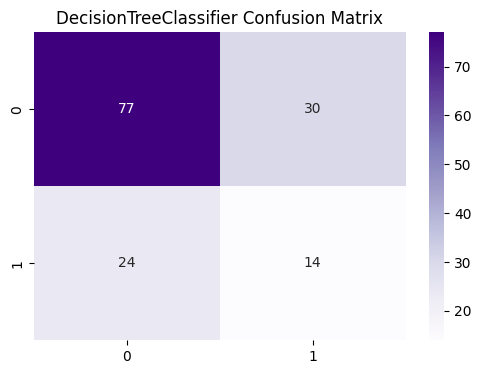

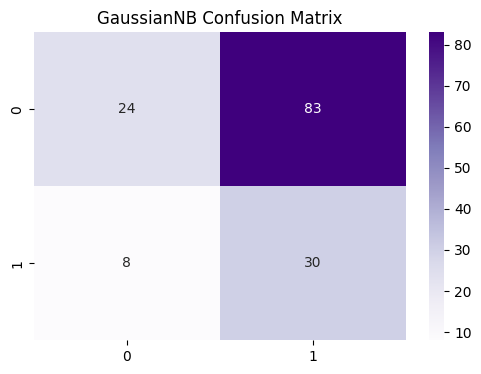

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Initialize dictionaries to store results
accuracy_results_smote = {}
confusion_matrices_smote = {}

# Iterate through models
for model in [DecisionTreeClassifier(random_state=42), GaussianNB()]:
    model_name = model.__class__.__name__
    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    accuracy_results_smote[model_name] = accuracy
    confusion_matrices_smote[model_name] = cm

# Display results
for model_name, accuracy in accuracy_results_smote.items():
    print(f"\nResults for {model_name}:")
    print(f"Accuracy: {accuracy:.4f}")



Feature: 0, Score: 0.03641
Feature: 1, Score: 0.07641
Feature: 2, Score: 0.09407
Feature: 3, Score: 0.00193
Feature: 4, Score: 0.00717


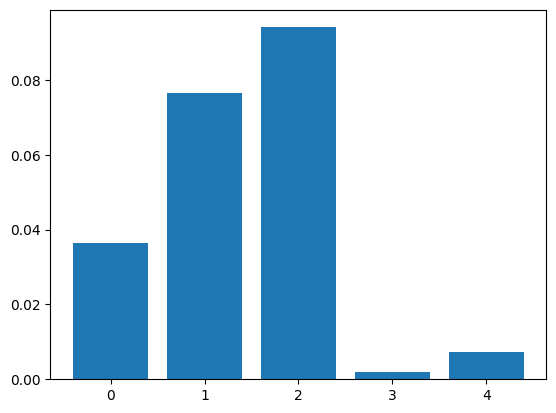

In [ ]:
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance

model = KNeighborsClassifier()
#fit the model
model.fit(X , y)
#perform permutation importance
results = permutation_importance(model , X , y , scoring = 'accuracy')
importance = results.importances_mean
for i,v in enumerate(importance):
  print('Feature: %0d, Score: %.5f' % (i,v))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from mlxtend.evaluate import bias_variance_decomp

url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
df = read_csv(url, header=None)
data = df.values
X, y = data[:, :-1], data[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
model = LinearRegression()

mse,bias,var = bias_variance_decomp(model, X_train, y_train, X_test, y_test, loss='mse', num_rounds=200, random_seed=1)

print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

MSE: 22.418
Bias: 20.744
Variance: 1.674
